# Simluations

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from models import *
from opt import encode
from tqdm import tnrange
from simulations.exp_radvansky import make_task, batch

sns.set_context('paper', font_scale=1.5)

Using TensorFlow backend.


TensorFlow Version: 1.9.0
Keras      Version: 2.2.0


In [2]:
# set the parameters, all of them!

# SEM parameters
df0 = 100
scale0 = .2

lmda = 1.0  # stickyness parameter
alfa = 1.  # concentration parameter

# f_class = KerasLSTM
f_class = GRUEvent
f_opts = dict(var_scale0=scale0, var_df0=df0)

# create the corrupted memory trace
# noise parameters
b = 2
tau = 0.1
print("tau: {}".format(tau))

# set the parameters for the Gibbs sampler
gibbs_kwargs = dict(
    memory_alpha = 0.1,
    memory_lambda = 1.0,  # was 1.0
    memory_epsilon = np.exp(-11),
    b = b,  # re-defined here for completeness
    tau = tau,  # ibid
    n_samples = 250,
    n_burnin = 100,
    progress_bar=False,
)

sem_kwargs = dict(
    lmda=lmda, alfa=alfa, f_class=f_class,
    f_opts=f_opts
)

# exp[eriment parameters

epsilon_e_switch = 0.25
epsilon_e_noswitch = 0.75

n_sess = 1
trials_per_sess = 100
n_test = 25
n_batch = 1

tau: 0.1


In [3]:
from tqdm import tnrange
res = []
for ii in tnrange(25):
    gibbs_kwargs = dict(
        memory_epsilon = np.exp(-11),
        memory_alpha = 0.1,
        memory_lambda = 1.0,
        b = b,  # re-defined here for completeness
        tau = tau,  # ibid
        n_samples = 250,
        n_burnin = 100,
        progress_bar=False,
    )

    sem = SEM(**sem_kwargs)
    res0 = batch(sem, gibbs_kwargs, epsilon_e_switch=epsilon_e_switch, 
                 epsilon_e_noswitch=epsilon_e_noswitch)
    res0['Itteration'] = ii
    if len(res) > 0:
        res = pd.concat([res, res0])
    else:
        res = res0    

  4%|▍         | 1/25 [00:06<02:38,  6.60s/it]models/memory.py:129: RuntimeWarning: divide by zero encountered in log
  log_p = p_model + np.log(p_sCRP)
                                                  

In [4]:
df = res.groupby(['Condition', 'Itteration']).mean()
df.groupby('Condition').mean()

,Accuracy,Pr(A > B)
Condition,,
No-Switch,0.236203,0.4176
Switch,0.179715,0.3504


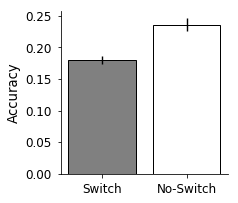

In [36]:
y = df.groupby('Condition').mean()['Accuracy']
y_err = df.groupby('Condition').std()['Accuracy'] / np.sqrt(25)
x= [1, 0]
plt.figure(figsize=(3,3))

plt.bar(x, y, color=[[1.0, 1.0, 1.0], [0.5, 0.5, 0.5]], edgecolor='k', linewidth=1)
plt.errorbar(x, y, y_err, linestyle="None", color='k')

plt.xticks([0, 1], ['Switch', 'No-Switch'])
plt.ylabel('Accuracy')
sns.despine()
plt.savefig('Radvansky_new.png', bbox_inches='tight', dpi=300)